In [ ]:
# https://www.kaggle.com/datasets/karnikakapoor/digits

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

## Set constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 32
CHANNELS=3
EPOCHS=10

## Import data into tensorflow dataset object

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)


Found 10160 files belonging to 10 classes.


In [4]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    validation_split=0.2,
    subset="training",
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    validation_split=0.2,
    subset="validation",
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)


Found 10160 files belonging to 10 classes.
Using 8128 files for training.
Found 10160 files belonging to 10 classes.
Using 2032 files for validation.


In [5]:
class_names = training_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
class_names = validation_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
X_train=[]
X_train_flatten=[]
y_train=[]
for image_batch, labels_batch in training_dataset:
    X_train.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))
    X_train_flatten.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten())
    y_train.append(labels_batch.numpy())
X_train= np.array(X_train)
y_train= np.array(y_train)

In [8]:
X_test=[]
X_test_flatten=[]
y_test=[]
for image_batch, labels_batch in validation_dataset:
    X_test.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))
    X_test_flatten.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten())
    y_test.append(labels_batch.numpy())
X_test= np.array(X_test)
y_test= np.array(y_test)

In [9]:
X_train.shape, X_test.shape

((8128, 32, 32), (2032, 32, 32))

In [10]:
X_train_flatten= np.array(X_train_flatten)
X_test_flatten= np.array(X_test_flatten)

In [11]:
X_train_flatten.shape ,X_test_flatten.shape

((8128, 1024), (2032, 1024))

In [12]:
# Scaling
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [13]:
# kera model build

tf_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(IMAGE_SIZE*IMAGE_SIZE,), activation='sigmoid')
])

tf_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tf_model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
254/254 [==============================] - 1s 1ms/step - loss: 0.8956 - accuracy: 0.7790
Epoch 2/5
254/254 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.9124
Epoch 3/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9215
Epoch 4/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9337
Epoch 5/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9432


In [17]:
# evaluate model

tf_model.evaluate(X_test_flatten, y_test)

64/64 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9380


[0.2244388312101364, 0.9379921555519104]

In [19]:
y_predicted = tf_model.predict(X_test_flatten)
y_predicted[0]

64/64 [==============================] - 0s 862us/step


array([0.009586  , 0.90571725, 0.2385535 , 0.05679846, 0.18087143,
       0.08468521, 0.01942252, 0.3036323 , 0.01541028, 0.03853916],
      dtype=float32)

(9, <matplotlib.image.AxesImage at 0x2331bcbdd60>)

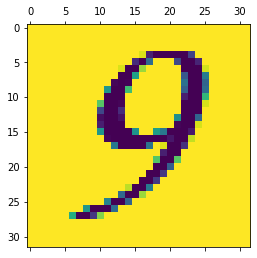

In [25]:
no_= 10
np.argmax(y_predicted[no_]), plt.matshow(X_test[no_])

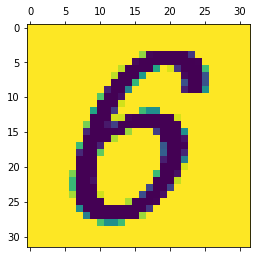

In [ ]:
np.array(X_train).shape

In [ ]:
image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten()

In [ ]:
training_dataset

In [ ]:
X_train=[]
y_train=[]
for i_ in range(len(training_dataset)):
    for image_batch, labels_batch in training_dataset:
        X_train.append(image_batch[i_].numpy())
        y_train.append(int(class_names[labels_batch]))
        
    
    

In [ ]:
X_test=[]
y_test=[]
for i_ in range(len(validation_dataset)):
    for image_batch, labels_batch in validation_dataset:
        X_test.append(image_batch[i_].numpy())
        y_test.append(int(class_names[labels_batch]))

In [ ]:
y_train

In [ ]:
for image_batch, labels_batch in dataset.take(2):
    print(class_names[labels_batch])

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    check= image_batch[0]
    print(image_batch[0].shape)
    print(class_names[labels_batch[0]])
    print(abc)

In [ ]:
check= check.numpy().astype("uint8").reshape(IMAGE_SIZE, IMAGE_SIZE)

In [ ]:
check

In [ ]:
for image_batch, labels_batch in dataset.take(1):

## Visualize some of the images from our dataset

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Train/validation/test split

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

## Cache, Shuffle, and Prefetch the Dataset

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)